# Lecture 2: phi4 theory in 2D

Using material from https://arxiv.org/pdf/2101.08176 

In this lecture, we will study a simple real scalar theory in two space-time dimensions. This example will hopefully give you some insight in how lattice QCD calculations are done. 

The goal is to generate configurations using the Metropolis-Hastings algorithm and evaluate the phase structure of the theory.

In [65]:
import numpy as np
import matplotlib.pyplot as plt

We define the action as:
\begin{equation}
\begin{split}
S^E_{\text{cont}}[\phi] &= \int d^2\vec{x} ~ (\partial_\mu \phi(\vec{x}))^2 + m^2 \phi(\vec{x})^2 + \lambda \phi(\vec{x})^4 \\
\rightarrow S^E_{\text{latt}}(\phi) &= \sum_{\vec{n}} \phi(\vec{n}) \left[ \sum_{\mu \in \{1,2\}} 2\phi(\vec{n}) - \phi(\vec{n}+\hat{\mu}) - \phi(\vec{n}-\hat{\mu}) \right] + m^2 \phi(\vec{n})^2 + \lambda \phi(\vec{n})^4
\end{split}
\end{equation}

In [33]:
def action(config,  M2, lam):
    action_density = M2*config**2 + lam*config**4
    for mu in range(2):
        action_density += 2*config**2
        action_density -= config*np.roll(config, -1, mu)
        action_density -= config*np.roll(config, 1, mu)
    return np.sum(action_density, axis=(0,1))
    
    
def next_porposal(config):    
    L1, L2 = config.shape
    delta = 2*np.random.rand( L1, L2 ) - 1 #random number between -1 and 1 with the shape of the lattice
    width = 0.05
    return config + width*delta




def metropolis_step(x_in, M2, lam):
    
    initial_action = action(x_in, M2, lam)
    
    x_proposal = next_porposal(x_in)
    
    proposal_action = action(x_proposal, M2, lam)
    
    accept_probability = np.random.rand()

    deltaS = proposal_action - initial_action
    
    if( np.exp(-deltaS) > accept_probability ):
        x_next = x_proposal
        accept = 1
    else:
        x_next = x_in
        accept = 0
        
    return x_next, accept

In [61]:
#choose parametrs
M2 = -1.0
lam = 8.0

#Volume of the lattice, V = L1*L2:
L1 = L2 = 5

#Initial guess
field = np.random.rand(L1,L2)
acceptance = []


configurations = [field]
Nsteps = 50000

for i in range(Nsteps-1):
    last_field = configurations[-1]
    new_field, accept =  metropolis_step(last_field, M2, lam)
    configurations.append(new_field)
    acceptance.append(accept)


configurations = np.array(configurations)
print("Acceptance is", np.mean(acceptance)*100 , "%" )
print("Typically the optimal choice is around 60-70%")

Acceptance is 78.76357527150543 %
Typically the optimal choice is around 60-70%


We can plot a typical configuration using a heatmap

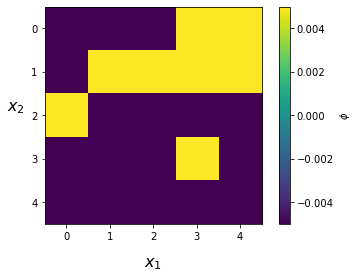

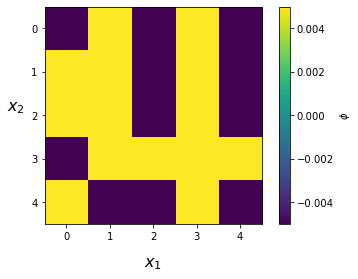

In [64]:
config1 = configurations[10000]
config2 = configurations[40000]

im = plt.imshow(config1, cmap='viridis', interpolation='nearest', vmin=-0.005, vmax=0.005)
plt.colorbar(im, label='$\phi$')
plt.xlabel('$x_1$', fontsize=16, rotation=0, labelpad=15)
plt.ylabel('$x_2$', fontsize=16, rotation=0, labelpad=15)
plt.show()

im2 = plt.imshow(config2, cmap='viridis', interpolation='nearest', vmin=-0.005, vmax=0.005)
plt.colorbar(im2, label='$\phi$')
plt.xlabel('$x_1$', fontsize=16, rotation=0, labelpad=15)
plt.ylabel('$x_2$', fontsize=16, rotation=0, labelpad=15)
plt.show()


### Exercises 1: Plot field configurations
1. Plot configurations and plot some random gaussian noise. What do you observe?



Let's evaluate a simple observable:
$$\langle O(\phi) \rangle =\left\langle  \left| \frac{1}{V}\sum_{\vec x} \phi(\vec x)|  \right| \right\rangle$$

In [30]:
#Evaluate a simple observable
observable1 = abs(np.sum(configurations/(L1*L2), axis=(1,2)))



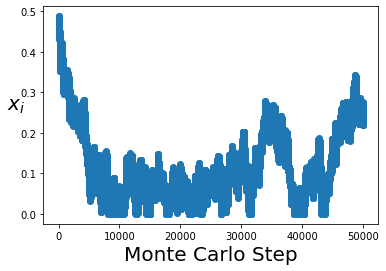

In [31]:
fig, ax = plt.subplots()

ax.set_ylabel("$x_i$", fontsize=20,rotation=0)
ax.set_xlabel("Monte Carlo Step", fontsize=20,rotation=0)

ax.plot(range(Nsteps), observable1, 'o' )


### Exercises 2: Tune your MCMC
1. Explore the acceptance as a function of the lattice volume. If you keep the hyperparameter "width" constant, what happens to the acceptance?
2. If you want to have a constant accept rate (approximately), how do you need to change the "width"? 
3. Make sure you choose a good thermalization point and truncate the chain for enough Metropolis steps


### Exercises 3: Finite-volume effects
1. Evaluate the observable and its error. Remember to account for thermalization, and also remember to include uncertainties. In order to deal with autocorrelations, you can either use "binning" or skip measurements like in the previous lecture.
2. Perform various lattice simulations for fixed parameters (M2 = -1.0, lam = 8.0), but different volumes. (Don't go crazy, and just do up to L=10. If you use bigger volumes, it may be slow!)
3. Compute the expectation value of the observable $ O(\phi)  =   |\frac{1}{V}\sum_{\vec x} \phi(\vec x)| $ for different volumes. 
4. Compare to the expectation in infinite volume for the symmetric phase, i.e. $\lim_{V \to \inf} \langle O(\phi) \rangle =0$



### Exercises 4: Phase transition
1. Now keep lam=8.0 fixed and choose one volume with less finite-volume effects (e.g L>6). For instance, change M2 in the range M2 $\in [0, -15]$ in steps of 1 or 2.
2. Plot the same observable \langle O(\phi) \rangle as a function of M2. What do you notice?
3. Bonus, increase the volume and repeat the exercise. What happens? Why?